In [1]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io as sio
np.random.seed(7)

In [2]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/Indian_pines_corrected.mat')['indian_pines_corrected']
Label=sio.loadmat('/content/drive/MyDrive/datasets/Indian_pines_gt.mat')['indian_pines_gt']

Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)

In [4]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [5]:
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

30


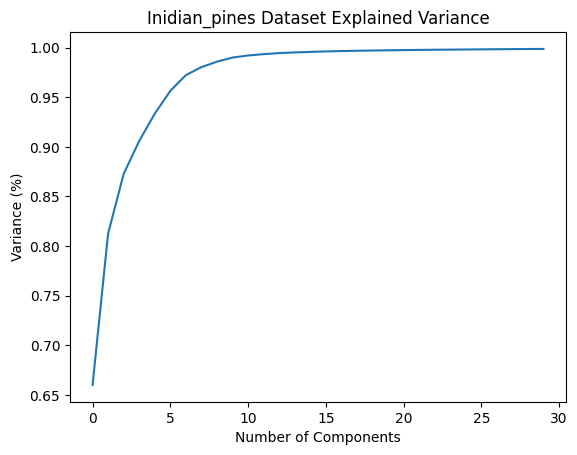

In [6]:
import matplotlib.pyplot as plt
pca = PCA(n_components=30)
pca.fit_transform(X_train)
newspace=pca.components_
newspace=newspace.transpose()
X_train=np.matmul(X_train,newspace)
print(pca.n_components_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Inidian_pines Dataset Explained Variance')
plt.show()
X_test=np.matmul(X_test,newspace)

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
gmm = GaussianMixture(n_components=len(np.unique(y_train)), covariance_type='full', random_state=42)
gmm.fit(X_train)

GaussianMixture(n_components=16, random_state=42)

In [9]:
y_pred = gmm.predict(X_test)

In [10]:
import pandas as pd
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

Accuracy : 12.731707317073171
Cohen Kappa Score : 3.4365981204174445
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00       286
           3       0.12      0.08      0.10       166
           4       0.07      0.02      0.03        47
           5       0.04      0.02      0.03        97
           6       0.00      0.00      0.00       146
           7       0.05      0.80      0.10         5
           8       0.00      0.00      0.00        96
           9       0.00      0.00      0.00         4
          10       0.05      0.03      0.03       194
          11       0.32      0.35      0.34       491
          12       0.00      0.00      0.00       119
          13       0.00      0.00      0.00        41
          14       0.33      0.00      0.01       253
          15       0.15      0.78      0.26        77
          16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.